# 데이터 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import os
from os.path import join

data_dir = os.getenv('HOME')+'/aiffel/datathon/seoul_bicycle_prediction'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

train_copy = train.copy()
test_copy = test.copy()

In [3]:
submission_data_path = join(data_dir, 'submission.csv')
submission = pd.read_csv(submission_data_path)
submission

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


### 결측치 확인 및 처리

In [ ]:
'''
정규화
from sklearn.preprocessing import MinMaxScaler

cols = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']
scaler = MinMaxScaler()
train[cols] = scaler.fit_transform(train[cols])
train
'''

In [5]:
# total_mean = (train + test) 데이터프레임을 시간에 대해 평균 계산
total_mean = pd.concat( [train, test] ).groupby('hour').mean()

# id, count, precipitation, visibility 칼럼 삭제
total_mean.drop('id', axis = 1, inplace = True)
total_mean.drop('count', axis = 1, inplace = True)
total_mean.drop('hour_bef_precipitation', axis = 1, inplace = True)
total_mean.drop('hour_bef_visibility', axis = 1, inplace = True)

# ozone, pm10, pm2.5에 대해 0시와 2시의 평균치로 대체
total_mean['hour_bef_ozone'][1] = ( total_mean['hour_bef_ozone'][0] + total_mean['hour_bef_ozone'][2] ) / 2
total_mean['hour_bef_pm10'][1] = ( total_mean['hour_bef_pm10'][0] + total_mean['hour_bef_pm10'][2] ) / 2
total_mean['hour_bef_pm2.5'][1] = ( total_mean['hour_bef_pm2.5'][0] + total_mean['hour_bef_pm2.5'][2] ) / 2

In [6]:
# train 사본에 train+test 컬럼을 합친 시간대별 평균값으로 결측치를 대체
for i in range(0, len(train_copy)):
    if np.isnan( train_copy['hour_bef_temperature'].iloc[i] )  :
        train_copy['hour_bef_temperature'].iloc[i] = total_mean['hour_bef_temperature'].iloc[train_copy['hour'].iloc[i]]

    if np.isnan( train_copy['hour_bef_windspeed'].iloc[i] )  :
        train_copy['hour_bef_windspeed'].iloc[i] = total_mean['hour_bef_windspeed'].iloc[train_copy['hour'].iloc[i]]

    if np.isnan( train_copy['hour_bef_humidity'].iloc[i] )  :
        train_copy['hour_bef_humidity'].iloc[i] = total_mean['hour_bef_humidity'].iloc[train_copy['hour'].iloc[i]]

    if np.isnan( train_copy['hour_bef_ozone'].iloc[i] )  :
        train_copy['hour_bef_ozone'].iloc[i] = total_mean['hour_bef_ozone'].iloc[train_copy['hour'].iloc[i]]

    if np.isnan( train_copy['hour_bef_pm10'].iloc[i] )  :
        train_copy['hour_bef_pm10'].iloc[i] = total_mean['hour_bef_pm10'].iloc[train_copy['hour'].iloc[i]]

    if np.isnan( train_copy['hour_bef_pm2.5'].iloc[i] )  :
        train_copy['hour_bef_pm2.5'].iloc[i] = total_mean['hour_bef_pm2.5'].iloc[train_copy['hour'].iloc[i]]

# test 사본에 train+test 컬럼을 합친 시간대별 평균값으로 결측치를 대체
for i in range(0, len(test_copy)):
    if np.isnan( test_copy['hour_bef_temperature'].iloc[i] )  :
        test_copy['hour_bef_temperature'].iloc[i] = total_mean['hour_bef_temperature'].iloc[test_copy['hour'].iloc[i]]

    if np.isnan( test_copy['hour_bef_windspeed'].iloc[i] )  :
        test_copy['hour_bef_windspeed'].iloc[i] = total_mean['hour_bef_windspeed'].iloc[test_copy['hour'].iloc[i]]

    if np.isnan( test_copy['hour_bef_humidity'].iloc[i] )  :
        test_copy['hour_bef_humidity'].iloc[i] = total_mean['hour_bef_humidity'].iloc[test_copy['hour'].iloc[i]]

    if np.isnan( test_copy['hour_bef_ozone'].iloc[i] )  :
        test_copy['hour_bef_ozone'].iloc[i] = total_mean['hour_bef_ozone'].iloc[test_copy['hour'].iloc[i]]

    if np.isnan( test_copy['hour_bef_pm10'].iloc[i] )  :
        test_copy['hour_bef_pm10'].iloc[i] = total_mean['hour_bef_pm10'].iloc[test_copy['hour'].iloc[i]]

    if np.isnan( test_copy['hour_bef_pm2.5'].iloc[i] )  :
        test_copy['hour_bef_pm2.5'].iloc[i] = total_mean['hour_bef_pm2.5'].iloc[test_copy['hour'].iloc[i]]

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
# train 사본의 precipitation, visibility 칼럼 삭제
train_copy.drop('hour_bef_precipitation', axis = 1, inplace = True)
train_copy.drop('hour_bef_visibility', axis = 1, inplace = True)

# test 사본의 precipitation, visibility 칼럼 삭제
test_copy.drop('hour_bef_precipitation', axis = 1, inplace = True)
test_copy.drop('hour_bef_visibility', axis = 1, inplace = True)

In [ ]:
'''
# train, test 데이터를 시간에 대해 평균 구하기
train_mean = train.groupby('hour').mean()
test_mean = test.groupby('hour').mean()

# 1시 데이터를 0시와 2시의 평균값으로 대체
train_mean['hour_bef_ozone'][1] = ( train_mean['hour_bef_ozone'][0] + train_mean['hour_bef_ozone'][2] ) / 2
train_mean['hour_bef_pm10'][1] = ( train_mean['hour_bef_pm10'][0] + train_mean['hour_bef_pm10'][2] ) / 2
train_mean['hour_bef_pm2.5'][1] = ( train_mean['hour_bef_pm2.5'][0] + train_mean['hour_bef_pm2.5'][2] ) / 2

test_mean['hour_bef_ozone'][1] = ( test_mean['hour_bef_ozone'][0] + test_mean['hour_bef_ozone'][2] ) / 2
test_mean['hour_bef_pm10'][1] = ( test_mean['hour_bef_pm10'][0] + test_mean['hour_bef_pm10'][2] ) / 2
test_mean['hour_bef_pm2.5'][1] = ( test_mean['hour_bef_pm2.5'][0] + test_mean['hour_bef_pm2.5'][2] ) / 2

# train에 시간대별 평균값으로 결측치를 대체
for i in range(0, len(train)):
    if np.isnan( train['hour_bef_temperature'].iloc[i] )  :
        train['hour_bef_temperature'].iloc[i] = train_mean['hour_bef_temperature'].iloc[train['hour'].iloc[i]]

    if np.isnan( train['hour_bef_precipitation'].iloc[i] )  :
        train['hour_bef_precipitation'].iloc[i] = 0

    if np.isnan( train['hour_bef_windspeed'].iloc[i] )  :
        train['hour_bef_windspeed'].iloc[i] = train_mean['hour_bef_windspeed'].iloc[train['hour'].iloc[i]]

    if np.isnan( train['hour_bef_humidity'].iloc[i] )  :
        train['hour_bef_humidity'].iloc[i] = train_mean['hour_bef_humidity'].iloc[train['hour'].iloc[i]]

    if np.isnan( train['hour_bef_visibility'].iloc[i] )  :
       train['hour_bef_visibility'].iloc[i] = train_mean['hour_bef_visibility'].iloc[train['hour'].iloc[i]]

    if np.isnan( train['hour_bef_ozone'].iloc[i] )  :
       train['hour_bef_ozone'].iloc[i] = train_mean['hour_bef_ozone'].iloc[train['hour'].iloc[i]]

    if np.isnan( train['hour_bef_pm10'].iloc[i] )  :
        train['hour_bef_pm10'].iloc[i] = train_mean['hour_bef_pm10'].iloc[train['hour'].iloc[i]]

    if np.isnan( train['hour_bef_pm2.5'].iloc[i] )  :
        train['hour_bef_pm2.5'].iloc[i] = train_mean['hour_bef_pm2.5'].iloc[train['hour'].iloc[i]]

# test에 시간대별 평균값으로 결측치를 대체
for i in range(0, len(test)):
    if np.isnan( test['hour_bef_temperature'].iloc[i] )  :
        test['hour_bef_temperature'].iloc[i] = test_mean['hour_bef_temperature'].iloc[test['hour'].iloc[i]]

    if np.isnan( test['hour_bef_precipitation'].iloc[i] )  :
        test['hour_bef_precipitation'].iloc[i] = 0

    if np.isnan( test['hour_bef_windspeed'].iloc[i] )  :
        test['hour_bef_windspeed'].iloc[i] = test_mean['hour_bef_windspeed'].iloc[test['hour'].iloc[i]]

    if np.isnan( test['hour_bef_humidity'].iloc[i] )  :
        test['hour_bef_humidity'].iloc[i] = test_mean['hour_bef_humidity'].iloc[test['hour'].iloc[i]]

    if np.isnan( test['hour_bef_visibility'].iloc[i] )  :
        test['hour_bef_visibility'].iloc[i] = test_mean['hour_bef_visibility'].iloc[test['hour'].iloc[i]]

    if np.isnan( test['hour_bef_ozone'].iloc[i] )  :
        test['hour_bef_ozone'].iloc[i] = test_mean['hour_bef_ozone'].iloc[test['hour'].iloc[i]]

    if np.isnan( test['hour_bef_pm10'].iloc[i] )  :
        test['hour_bef_pm10'].iloc[i] = test_mean['hour_bef_pm10'].iloc[test['hour'].iloc[i]]

    if np.isnan( test['hour_bef_pm2.5'].iloc[i] )  :
        test['hour_bef_pm2.5'].iloc[i] = test_mean['hour_bef_pm2.5'].iloc[test['hour'].iloc[i]]
'''

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

it_train = train_copy.copy()

In [ ]:
# count 컬럼 빼기
it_train = it_train.drop(['count'],axis = 1)

In [ ]:
# IterativeImputer()를 통해 결측치를 대체
it_train = IterativeImputer(random_state=2023).fit_transform(it_train)

In [8]:
itlmp = pd.DataFrame(it_train)

In [9]:
itlmp2 = pd.DataFrame(it_test)

In [10]:
itlmp

,0,1,2,3,4,5,6,7,8,9,10
0,3.0,20.0,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6.0,13.0,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7.0,6.0,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8.0,23.0,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9.0,18.0,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174.0,4.0,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175.0,3.0,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176.0,5.0,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178.0,21.0,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [11]:
itlmp2

,0,1,2,3,4,5,6,7,8,9
0,0.0,7.0,20.7,0.0,1.3,62.0,954.0,0.041000,44.000000,27.000000
1,1.0,17.0,30.0,0.0,5.4,33.0,1590.0,0.061000,49.000000,36.000000
2,2.0,13.0,19.0,1.0,2.1,95.0,193.0,0.020000,36.000000,28.000000
3,4.0,6.0,22.5,0.0,2.5,60.0,1185.0,0.027000,52.000000,38.000000
4,5.0,22.0,14.6,1.0,3.4,93.0,218.0,0.041000,18.000000,15.000000
...,...,...,...,...,...,...,...,...,...,...
710,2148.0,1.0,24.6,0.0,2.4,60.0,1745.0,0.034665,31.450164,22.139637
711,2149.0,1.0,18.1,0.0,1.0,55.0,2000.0,0.018487,24.729253,13.965792
712,2165.0,9.0,23.3,0.0,2.3,66.0,1789.0,0.020000,17.000000,15.000000
713,2166.0,16.0,27.0,0.0,1.6,46.0,1956.0,0.032000,40.000000,26.000000


In [12]:
itlmp.columns = ['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity',
                'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count']

In [13]:
itlmp2.columns = ['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity',
                'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']

In [14]:
itlmp

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3.0,20.0,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6.0,13.0,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7.0,6.0,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8.0,23.0,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9.0,18.0,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174.0,4.0,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175.0,3.0,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176.0,5.0,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178.0,21.0,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [15]:
itlmp2

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0.0,7.0,20.7,0.0,1.3,62.0,954.0,0.041000,44.000000,27.000000
1,1.0,17.0,30.0,0.0,5.4,33.0,1590.0,0.061000,49.000000,36.000000
2,2.0,13.0,19.0,1.0,2.1,95.0,193.0,0.020000,36.000000,28.000000
3,4.0,6.0,22.5,0.0,2.5,60.0,1185.0,0.027000,52.000000,38.000000
4,5.0,22.0,14.6,1.0,3.4,93.0,218.0,0.041000,18.000000,15.000000
...,...,...,...,...,...,...,...,...,...,...
710,2148.0,1.0,24.6,0.0,2.4,60.0,1745.0,0.034665,31.450164,22.139637
711,2149.0,1.0,18.1,0.0,1.0,55.0,2000.0,0.018487,24.729253,13.965792
712,2165.0,9.0,23.3,0.0,2.3,66.0,1789.0,0.020000,17.000000,15.000000
713,2166.0,16.0,27.0,0.0,1.6,46.0,1956.0,0.032000,40.000000,26.000000


# 이상치 탐지 및 제거

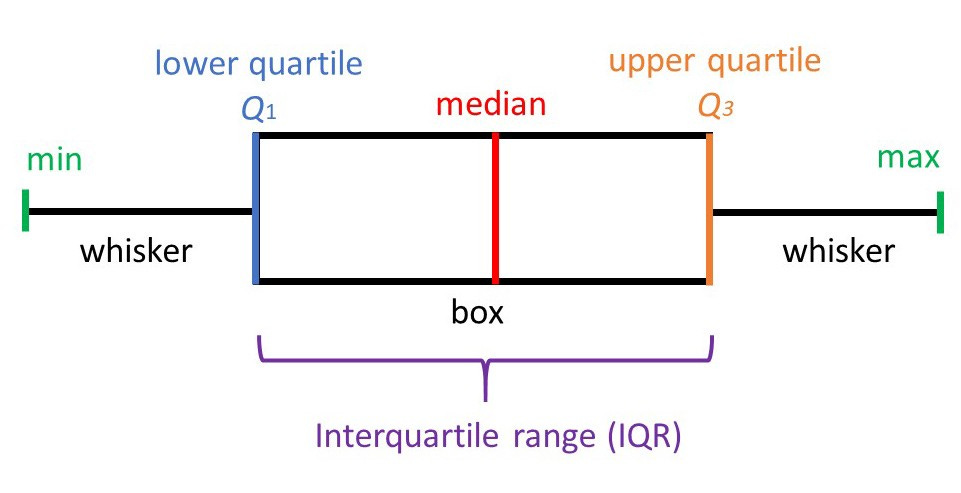

[출처] : https://kkockko.substack.com/p/--63c

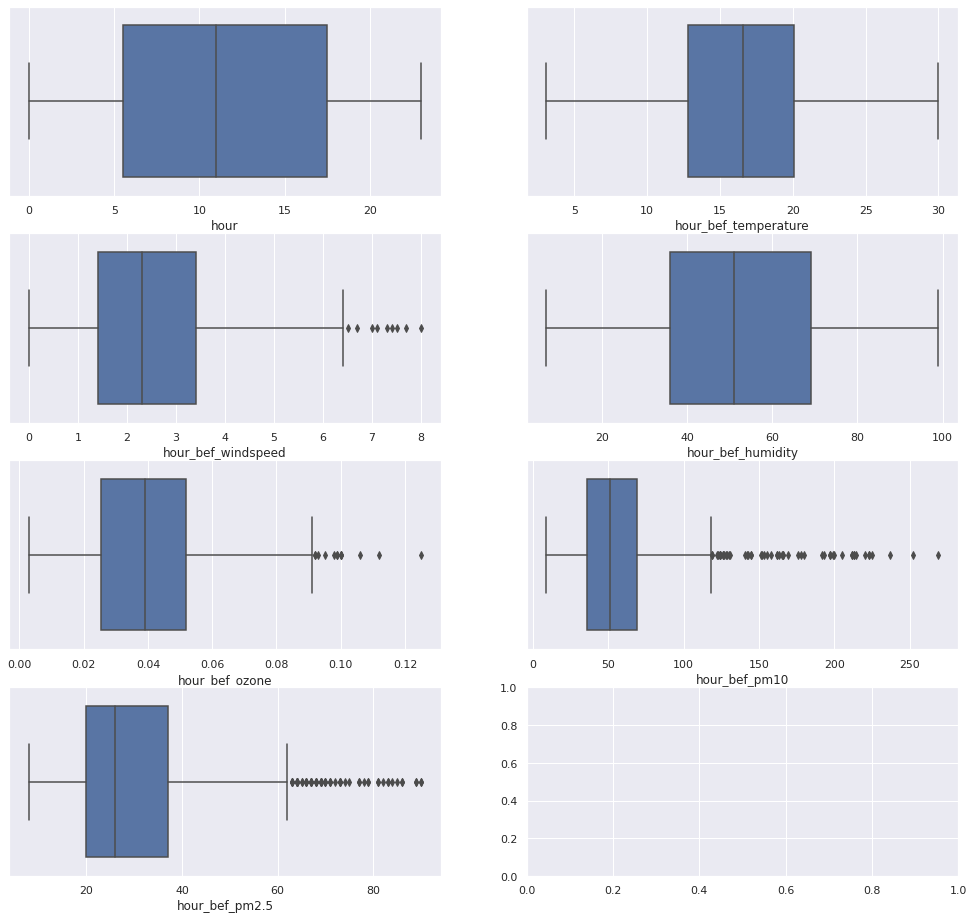

In [49]:
fig, ax = plt.subplots(4, 2, figsize=(17, 16))
sns.boxplot(x='hour', data=train_copy2, ax=ax[0][0])
sns.boxplot(x='hour_bef_temperature', data=train_copy2, ax=ax[0][1])
sns.boxplot(x='hour_bef_windspeed', data=train_copy2, ax=ax[1][0])
sns.boxplot(x='hour_bef_humidity', data=train_copy2, ax=ax[1][1])
sns.boxplot(x='hour_bef_ozone', data=train_copy2, ax=ax[2][0])
sns.boxplot(x='hour_bef_pm10', data=train_copy2, ax=ax[2][1])
sns.boxplot(x='hour_bef_pm2.5', data=train_copy2, ax=ax[3][0])
plt.show()

In [30]:
itlmp_mid = itlmp.copy()

for ilt in itlmp.columns:
    Q1=itlmp_mid[ilt].quantile(0.25)
    Q3=itlmp_mid[ilt].quantile(0.75)
    IQR=Q3-Q1
    train_delout=itlmp_mid[(itlmp_mid[ilt]<(Q1 - 1.5*IQR)) | (itlmp_mid[ilt]>(Q3 + 1.5*IQR))]
    itlmp_mid=itlmp_mid.drop(train_delout.index, axis=0)

In [32]:
itlmp_mid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264 entries, 1 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1264 non-null   float64
 1   hour                    1264 non-null   float64
 2   hour_bef_temperature    1264 non-null   float64
 3   hour_bef_precipitation  1264 non-null   float64
 4   hour_bef_windspeed      1264 non-null   float64
 5   hour_bef_humidity       1264 non-null   float64
 6   hour_bef_visibility     1264 non-null   float64
 7   hour_bef_ozone          1264 non-null   float64
 8   hour_bef_pm10           1264 non-null   float64
 9   hour_bef_pm2.5          1264 non-null   float64
 10  count                   1264 non-null   float64
dtypes: float64(11)
memory usage: 118.5 KB


In [47]:
itlmp.drop('hour_bef_visibility', axis = 1)
itlmp2.drop('hour_bef_visibility', axis = 1)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0.0,7.0,20.7,0.0,1.3,62.0,0.041000,44.000000,27.000000
1,1.0,17.0,30.0,0.0,5.4,33.0,0.061000,49.000000,36.000000
2,2.0,13.0,19.0,1.0,2.1,95.0,0.020000,36.000000,28.000000
3,4.0,6.0,22.5,0.0,2.5,60.0,0.027000,52.000000,38.000000
4,5.0,22.0,14.6,1.0,3.4,93.0,0.041000,18.000000,15.000000
...,...,...,...,...,...,...,...,...,...
710,2148.0,1.0,24.6,0.0,2.4,60.0,0.034665,31.450164,22.139637
711,2149.0,1.0,18.1,0.0,1.0,55.0,0.018487,24.729253,13.965792
712,2165.0,9.0,23.3,0.0,2.3,66.0,0.020000,17.000000,15.000000
713,2166.0,16.0,27.0,0.0,1.6,46.0,0.032000,40.000000,26.000000


In [16]:
train_x = itlmp.drop('count', axis=1)
train_y = itlmp['count']

# 모델 학습

## GridSearch 사용하기

In [12]:
# count 컬럼 빼면서 train_x, train_y로 나누기
train_x = train_copy.drop(['count'], axis = 1)
train_y = train_copy['count']

# GridSearch, RandomForestRegressor 불러오기
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()
grid = GridSearchCV(rf, params, cv=3, n_jobs=-1)
grid.fit(train_x, train_y)

# 최적의 하이퍼파라미터를 찾음
grid.best_params_

{'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [16]:
# RandomForestRegressor
model=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=4, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=0)
model.fit(train_x,train_y)

/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', max_depth=7, min_samples_leaf=4,
                      min_samples_split=5, n_estimators=200, random_state=0)

In [17]:
# 예측값 생성
pred = model.predict(test_copy)

In [18]:
# 제출파일에 예측값 대입
submission['count'] = pred

In [19]:
submission

,id,count
0,0,98.054365
1,1,234.855233
2,2,99.726249
3,4,30.886650
4,5,82.504610
...,...,...
710,2148,53.442396
711,2149,57.784459
712,2165,121.543616
713,2166,168.399432


In [20]:
# 제출파일 생성
submission.to_csv("0420_1st_submission.csv", index = False)

In [21]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [22]:
pred = model.predict(test_copy)

In [23]:
submission['count'] = pred

## test DATA도 결측치를 채웁니다.

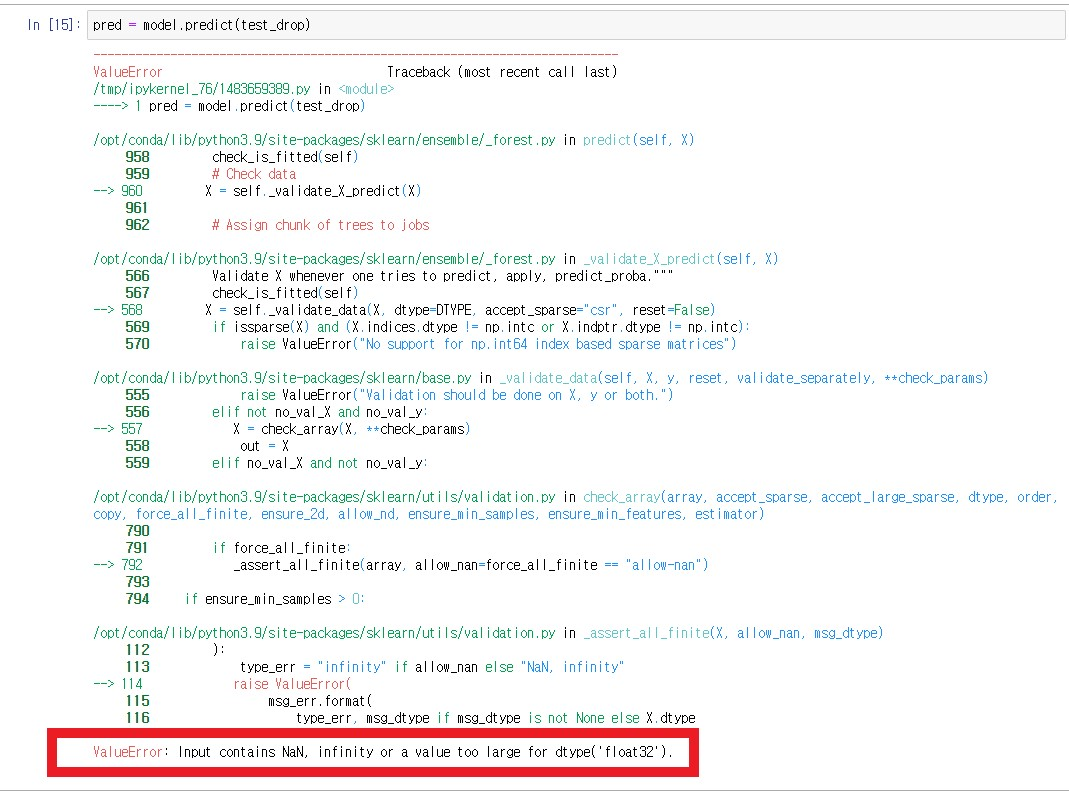

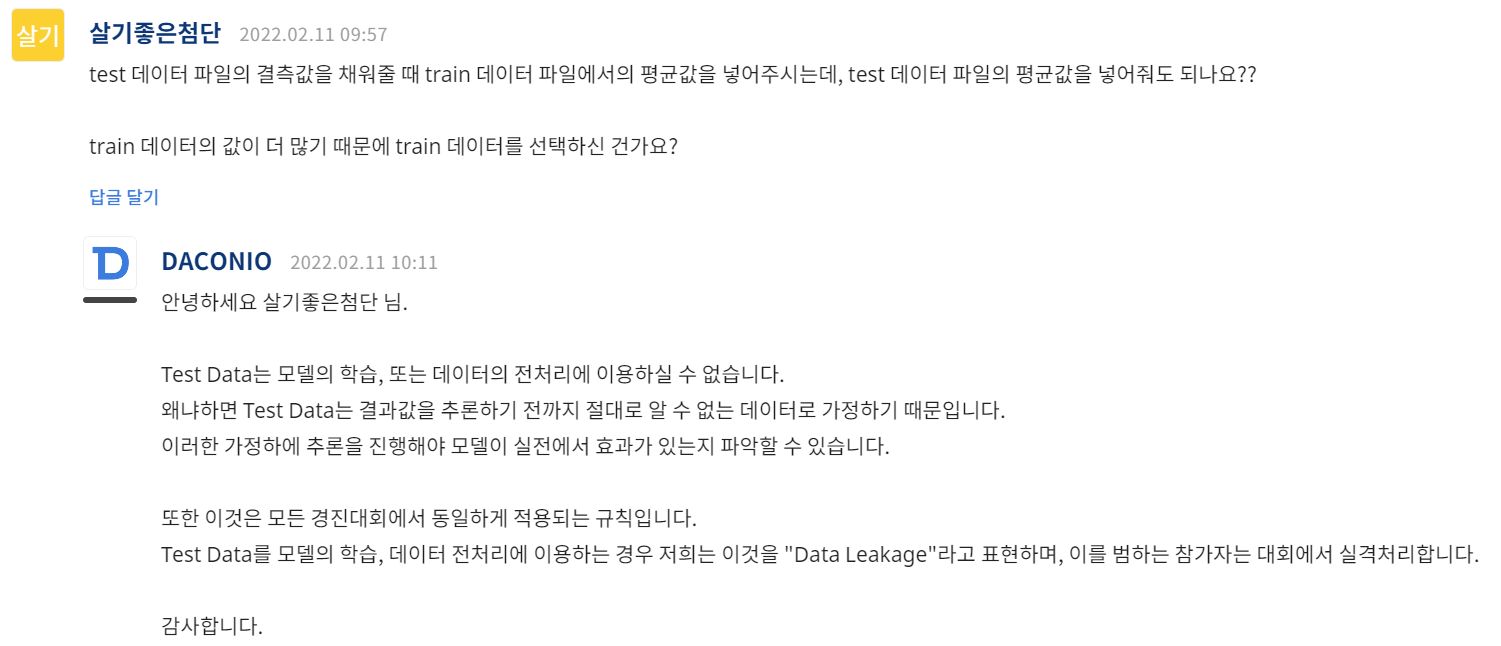<br>
[출처] https://dacon.io/competitions/official/235576/talkboard/401061

In [24]:
submission

,id,count
0,0,104.637680
1,1,235.478487
2,2,104.123537
3,4,108.223802
4,5,140.875599
...,...,...
710,2148,95.277888
711,2149,59.099086
712,2165,128.377235
713,2166,185.077693


In [25]:
submission.to_csv("0420_2nd_submission.csv", index = False)

In [26]:
# Ridge 회귀
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(train_x,train_y)

Ridge()

In [31]:
pred = ridge.predict(test_copy)

In [32]:
submission['count'] = pred

In [33]:
submission

,id,count
0,0,102.891799
1,1,237.888307
2,2,107.630771
3,4,112.327708
4,5,139.241365
...,...,...
710,2148,99.142583
711,2149,59.401032
712,2165,134.156771
713,2166,189.559376


In [34]:
submission.to_csv("0420_4th_submission.csv", index = False)

In [35]:
# Lasso 회귀
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(train_x,train_y)

Lasso()

In [36]:
pred = lasso.predict(test_copy)

In [37]:
submission['count'] = pred

In [38]:
submission

,id,count
0,0,102.864023
1,1,236.627855
2,2,108.334955
3,4,112.982918
4,5,138.048189
...,...,...
710,2148,99.773022
711,2149,60.124795
712,2165,135.755956
713,2166,191.626183


In [39]:
submission.to_csv("0420_5th_submission.csv", index = False)

In [17]:
# RandomForestRegressor 2nd trial
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=200)
model.fit(train_x,train_y)

RandomForestRegressor(n_estimators=200)

In [18]:
pred = model.predict(itlmp2)

In [19]:
submission['count'] = pred

In [20]:
submission

,id,count
0,0,97.825
1,1,227.225
2,2,96.850
3,4,31.825
4,5,78.330
...,...,...
710,2148,54.020
711,2149,63.700
712,2165,121.295
713,2166,162.495


In [21]:
submission.to_csv("0420_last_submission.csv", index = False)